Step 1: Load the Wikipedia GLoVE Word2Vec.


In [ ]:
pip install torchtext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.2 MB/s eta 0:00:00


In [ ]:
import torch
from torchtext.vocab import GloVe

# Loading the GloVe model trained on 6 billion tokens, with 100-dimensional vectors
glove = GloVe(name='6B', dim=100)

print("GloVe embeddings loaded successfully.")


.vector_cache/glove.6B.zip: 862MB [02:40, 5.38MB/s]                           
100%|█████████▉| 399999/400000 [00:18<00:00, 21298.78it/s]


GloVe embeddings loaded successfully.


Step 2: Show how similar are these words:

                 Man and Woman

                 Chair and Throne

                 water and baby

In [ ]:
def word_similarity(word1, word2, embedding):
    """
    Calculate the cosine similarity between two words given their embeddings.

    Parameters:
    - word1: A string representing the first word.
    - word2: A string representing the second word.
    - embedding: The pretrained GloVe embeddings.

    Returns:
    - Cosine similarity as a float.
    """
    vec1 = embedding[word1]  # Get the embedding for word1
    vec2 = embedding[word2]  # Get the embedding for word2

    # Calculate cosine similarity
    cos_sim = torch.nn.functional.cosine_similarity(vec1.unsqueeze(0), vec2.unsqueeze(0))
    return cos_sim.item()

# Examples
print(f"Similarity between 'man' and 'woman': {word_similarity('man', 'woman', glove)}")
print(f"Similarity between 'chair' and 'throne': {word_similarity('chair', 'throne', glove)}")
print(f"Similarity between 'water' and 'baby': {word_similarity('water', 'baby', glove)}")


Similarity between 'man' and 'woman': 0.8323494791984558
Similarity between 'chair' and 'throne': 0.3001340627670288
Similarity between 'water' and 'baby': 0.40317270159721375


The code calculates similarity between words using GloVe embeddings by computing the cosine similarity between their vector representations. GloVe vectors position words in a multidimensional space based on their usage, and cosine similarity measures the cosine of the angle between two vectors. Values closer to 1 indicate higher similarity, reflecting the semantic closeness of the words based on their contextual use in language.

Step 3: Using these provide analogies for the following:

             _____ is to King as Woman is to Man.

             _____ is to Princess as Man is to Woman.

             _____ is to a woman as a child is to an adult.



In [ ]:
import torch

def find_analogy(a, b, c, embeddings):
    """
    Solves analogies of the form: a is to b as c is to __.

    Parameters:
    - a, b, c: Words in the analogy a:b :: c:__.
    - embeddings: The pretrained GloVe embeddings.

    Returns:
    - The word that completes the analogy.
    """
    # Get embeddings for each word
    vec_a = embeddings[a]
    vec_b = embeddings[b]
    vec_c = embeddings[c]

    # Perform the vector operation b - a + c
    analogy_vec = vec_b - vec_a + vec_c

    # Find the closest word to the resulting vector
    # Note: For simplicity, this example does not exclude the input words from the search
    # In a more sophisticated implementation, you would exclude a, b, c from the search
    all_words = embeddings.stoi.keys()
    max_similarity = -float('Inf')
    analogous_word = None

    for word in all_words:
        if word in [a, b, c]:  # Skip the words involved in the analogy
            continue
        vec_word = embeddings[word]
        similarity = torch.nn.functional.cosine_similarity(analogy_vec.unsqueeze(0), vec_word.unsqueeze(0))
        if similarity > max_similarity:
            max_similarity = similarity
            analogous_word = word

    return analogous_word

# Load the GloVe embeddings
glove = GloVe(name='6B', dim=100)

# Solve the analogies
print(f"____ is to King as Woman is to Man: {find_analogy('man', 'king', 'woman', glove)}")
print(f"____ is to Princess as Man is to Woman: {find_analogy('woman', 'princess', 'man', glove)}")
print(f"____ is to a woman as a child is to an adult: {find_analogy('adult', 'child', 'woman', glove)}")


____ is to King as Woman is to Man: queen
____ is to Princess as Man is to Woman: prince
____ is to a woman as a child is to an adult: mother


This code solves word puzzles by finding relationships between words using GloVe embeddings, which are a way to represent words as vectors based on their meanings. It does math with these vectors to solve puzzles like "man is to king as woman is to what?" The answer it finds, like "queen" for this puzzle, shows how these embeddings understand the meanings and relationships between words.

The output anwers the blanks asked as to Queen is to King as woman is to man
Prince to to princess as man is to woman
Mother is to woman as child is to an adult

Step 4: Apply Naive-Bayes Classifier on the Spam-Ham dataset shown in the demo.

In [ ]:
pip install scikit-plot

In [ ]:
pip install sklearn-pandas

In [ ]:
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
#from scipy.sparse import csr_matrix
import scikitplot as skplt
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
#from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Making an emoticon list

In [ ]:
emotions_list = [":)", ":(", ":p", ":D", "-_-", ":o"]

In [ ]:
def char_flag(l):
    if l <= 40:
        return 1
    elif l <= 60:
        return 2
    elif l <= 80:
        return 3
    elif l <= 120:
        return 4
    elif l <= 160:
        return 5
    else:
        return 6

In [ ]:
# This function removes punctuation, lowercases, and stems words from a message, excluding any stop words.
stop_words = []
def text_process(mess):
    no_punct = re.sub('[^A-Za-z ]+', '', mess.lower())
    return np.array([stemmer.stem(word) for word in no_punct.split() if word not in stop_words])

In [ ]:
def preprocessing_text():
    for d, ln in zip(messages_data, token_4):
        token_1.append(d)
        token_2.append(d.count('$'))
        x =re.sub('[^0-9 ]+', '', d.lower())
        token_3.append(len(x))
        token_5.append(char_flag(ln))
        if (re.sub(r'[^://@]', '', d.lower())) is not '':
            token_6.append(1)
        else:
            token_6.append(0)
        token_7.append(len(x.split()))
        for emoji in emotions_list:
            if(re.search(re.escape(emoji), d)):
                token_8.append(1)
            else:
                token_8.append(0)
    return np.array(
        [np.array([token_1[i], token_2[i], token_3[i], token_4[i], token_5[i], token_6[i],
                   token_7[i],token_8[i]], dtype=object) for i in
         range(len(messages_data))])

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-14-3b9ebe6f7829>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if (re.sub(r'[^://@]', '', d.lower())) is not '':


In [ ]:
def data_mapper():
    data = preprocessing_text()
    labels = ['message','f1','f2','f3','f4','f5','f6','f7']
    df = pd.DataFrame.from_records(data,columns=labels)
    mapper = DataFrameMapper([
    (['f1', 'f2','f3','f4','f5','f6','f7'], None),
    ('message',CountVectorizer(analyzer = text_process,ngram_range=(2, 2)))])
    X=mapper.fit_transform(df)
    return X

The code converts text to a feature matrix by keeping some features unchanged and applying bigram vectorization to the 'message' column, preparing the data for machine learning.

In [ ]:
# loading `spam.csv` file into a DataFrame, printing it, removing unnecessary columns, keeping only labels and messages for further analysis.
import pandas as pd

if __name__ == "__main__":
    # Adjusted file path for Google Colab
    messages = pd.read_csv("spam.csv", encoding='latin-1')
    print(messages)
    messages = messages.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
    print(messages)



        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
messages['length'] = messages['v2'].apply(len)
messages_data = messages['v2']
messages_labels = messages['v1']
print(messages)

        v1                                                 v2  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
...    ...                                                ...     ...
5567  spam  This is the 2nd time we have tried 2 contact u...     161
5568   ham              Will Ì_ b going to esplanade fr home?      37
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]


In [ ]:
# printing the frequency of the words
token_1 = []
token_2 = []
token_3 = []
token_4 = messages['length']
token_5 = []
token_6 = []
token_7 = []
token_8 = []

freq = pd.Series(' '.join(messages_data).split()).value_counts()
print(freq)

to             2134
you            1622
I              1466
a              1327
the            1197
               ... 
envy              1
see's             1
parents.:)i       1
hand:)            1
me!;              1
Length: 15585, dtype: int64


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(freq[-9268:].index)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

The code adds the 9268 rarest words from the dataset to the English stop words list and prints the updated list, helping to remove less important words from analysis.

In [ ]:
mapped_data = data_mapper()

trainset, testset, trainlabel, testlabel = train_test_split(mapped_data, messages_labels, test_size=0.33, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


Naive Bayes Classifer

Confusion matrix for Naive Bayes classifier:  [[1577   10]
 [  19  233]]
Accuracy for Naive Bayes classifier:  0.9842305600870038


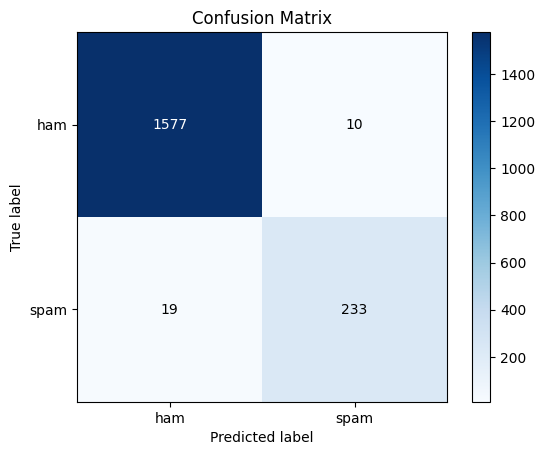

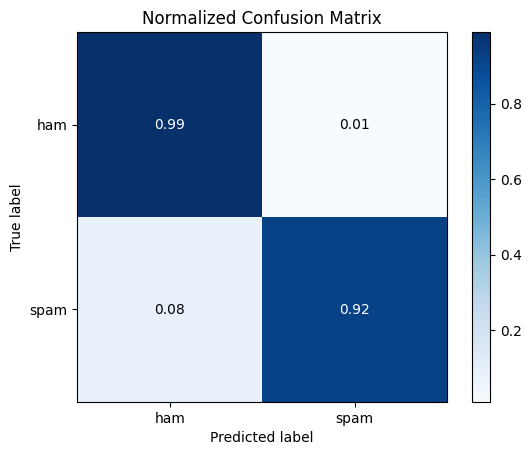

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import scikitplot as skplt


naive_bayes = MultinomialNB()


naive_bayes.fit(trainset, trainlabel)
predicted_values_naive = naive_bayes.predict(testset)


accuracy_naive = accuracy_score(testlabel, predicted_values_naive)


clf_naive = MultinomialNB()
scores_naive = cross_val_score(clf_naive, trainset, trainlabel, cv=5)

confusion_matrix_Naive_bayes = confusion_matrix(testlabel, predicted_values_naive, labels=["ham", "spam"])
skplt.metrics.plot_confusion_matrix(testlabel, predicted_values_naive, normalize=False)
skplt.metrics.plot_confusion_matrix(testlabel, predicted_values_naive, normalize=True)

print('Confusion matrix for Naive Bayes classifier: ', confusion_matrix_Naive_bayes)
print('Accuracy for Naive Bayes classifier: ', accuracy_naive)
plt.show()


The first confusion matrix shows that out of the test set, 1577 'ham' (non-spam) messages were correctly identified, while 10 were misclassified as 'spam'. Conversely, the model correctly identified 233 'spam' messages but misclassified 19 as 'ham'. The normalized matrix indicates that the classifier correctly identified 99% of 'ham' and 92% of 'spam' messages, demonstrating high accuracy and a slightly higher tendency to misclassify 'spam' messages as 'ham' than the other way around.

In [ ]:
print("acurracy_Naive_Bayes " + str(accuracy_naive))
print ('\n')
print('validation scores: ', scores_naive)

acurracy_Naive_Bayes 0.9842305600870038


validation scores:  [0.98393574 0.9772423  0.98393574 0.98659517 0.97989276]
